# Labour Portfolios (Old Version)

Create the all possible Labour Portfolios in the Economy.

### Input Variables:

$G$ Number of different heterogenous tenure workes  
$N$ Max Number of Workers hired during one period  
  
$M_D$ Maximum Demand in the Economy  
$F_G$ Productivity of last tenure workers

### Output Variables:

$\mathbb{L}$ Matrix with $S_L$ Labour Portfolio States with $G$ different types of workers  
$S_L$ Size of the State Space of Labourt Portfolios

## Function:

In [3]:
function LabourPortfolio(G::Int,N::Int,M_D::Float64,F_G::Float64)
    
    """Create all the Labour Portfolios
    a firm can have given the Economy

    Parameters
    ----------
    G  : Generations
    N  : Max Number of Workers hired in a Period 
    M_D: Maximum Demand
    F_G: Productivity of G Tenure Workers
    
    Output
    ----------
    L    : Matrix with S_L Labour Portfolio States with G different types of workers
    SizeL: Size of the State Space of Labourt Portfolios 
    """
    
    N_G=ceil(M_D/F_G);
    
    LG=[0:1:N_G];
    Li=[0:1:N];
    
    SizeL=convert(Int,(N+1)^(G-1)*(N_G+1));
    
    L=zeros(Int,SizeL,G);
    
    Reps=div(SizeL,(N+1));
    
    for i=1:G-1
        
        innr=(N+1)^(i-1);
        outr=div(SizeL,(N+1)^i);
        
        L[:,i]=repeat(Li,inner=[innr],outer=[outr]);
        
    end
    
    innr=convert(Int,SizeL/(N_G+1));
    
    L[:,G]=repeat(LG,inner=[innr],outer=[1]);
    
    return L', SizeL
    
end

LabourPortfolio (generic function with 1 method)

## Example

### Parameters:

In [4]:
G=3;
N=3;

M_D=9.;
F_G=1.;

In [5]:
Labour=LabourPortfolio(G,N,M_D,F_G);

#### Portfolios:

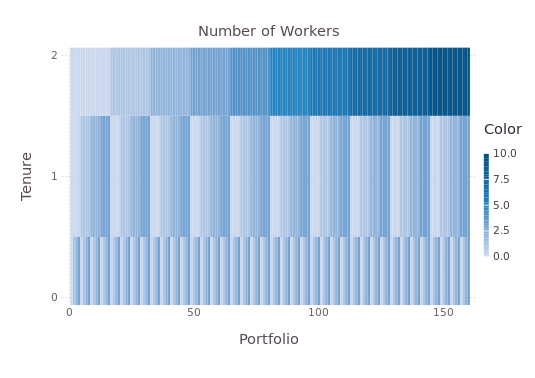

In [6]:
using Gadfly
using Color

L=Labour[1];
S_L=Labour[2];

x=repeat([1:S_L],inner=[G])
y=repeat([0:G-1],outer=[S_L])

plot(x=x, y=y, color=L[:],
Scale.ContinuousColorScale(Scale.lab_gradient(color(RGB(202/255,215/255,237/255)),color(RGB(37/255,131/255,192/255)),color(RGB(0/255,74/255,124/255)))),
Guide.ylabel("Tenure"),
Guide.xlabel("Portfolio"),
Guide.title("Number of Workers"),
Guide.yticks(ticks=[0:1:G-1]),
Guide.xticks(ticks=[0:50:S_L]),
Geom.rectbin)